In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
df = pd.read_csv('C:/Users/Margarita/Downloads/lesson_3_data__1_.csv', encoding='windows - 1251')

In [41]:
df.head(6)

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta
5,1247,120070908003099509,1,2007/09/08,0.812326,93265591,9326559,159871,101070640100,1010706401,...,10107064,10107,101,1,1.29,1.0,159871,SPAGUETI PLATOS 500 G Brand_2,PASTA ALIMENTICIA SE,pasta


In [42]:
user_df = df[['tc','art_sp' ]]

In [43]:
user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [44]:
user_df = user_df.rename(columns={'tc' : 'user_id', 'art_sp' : 'brand_info'})

In [55]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [46]:
brnd_nme = 'MARAVILLA 500 G Store_Brand'
brnd_nme.split(' ')[-1]

'Store_Brand'

In [52]:
def split_brand(brand_info):
    return brand_info.split(' ')[-1]

In [53]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [54]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [58]:
user_df.brand_info.apply(lambda x : x.split(' ')[-1])

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
5            Brand_2
6        Store_Brand
7        Store_Brand
8            Brand_3
9        Store_Brand
10           Brand_4
11           Brand_4
12           Brand_1
13           Brand_4
14       Store_Brand
15       Store_Brand
16       Store_Brand
17           Brand_4
18           Brand_4
19       Store_Brand
20       Store_Brand
21       Store_Brand
22           Brand_4
23           Brand_1
24           Brand_4
25           Brand_4
26           Brand_4
27       Store_Brand
28       Store_Brand
29           Brand_4
            ...     
48099        Brand_1
48100    Store_Brand
48101    Store_Brand
48102        Brand_2
48103        Brand_4
48104        Brand_4
48105        Brand_4
48106        Brand_4
48107    Store_Brand
48108    Store_Brand
48109        Brand_2
48110        Brand_4
48111        Brand_3
48112        Brand_1
48113    Store_Brand
48114    Store_Brand
48115        

In [74]:
#отобрать пользователей, которые совершили больше 5 покупок
users_purchases = user_df.groupby('user_id', as_index = False)\
    .agg({'brand_name' : 'count'})\
    .rename(columns={'brand_name' : 'perchases'})\
    .query('perchases >= 5')

In [95]:
#отобрать пользователей, которые совершили больше 5 покупок разных брендов и
#сделали разбивку по брендам и отсортировали по убыванию
lovely_brand_perchase = user_df.groupby(['user_id', 'brand_name'], as_index = False)\
    .agg({'brand_info' : 'count'})\
    .sort_values(['user_id', 'brand_info'], ascending=[False,False])\
    .groupby('user_id')\
    .head(1)\
    .rename(columns={'brand_name' : 'lovely_brand', 'brand_info' : 'lovely_brand_perchases'})

In [101]:
user_unique_brands =  user_df.groupby(['user_id'], as_index = False)\
    .agg({'brand_name' : pd.Series.nunique})\
    .rename(columns={'brand_name' : 'unique_brands'})

In [111]:
#объединяем датафреймы
users_purchases.merge(user_unique_brands, on='user_id')\
    .merge(lovely_brand_perchase, on='user_id')

,user_id,perchases,unique_brands,lovely_brand,lovely_brand_perchases
0,1031,6,1,Store_Brand,5
1,4241,5,1,Brand_4,3
2,25971,7,1,Store_Brand,5
3,40911,27,1,Brand_4,19
4,45181,5,1,Store_Brand,2
5,63001,8,1,Brand_4,7
6,63441,6,1,Store_Brand,4
7,64121,5,1,Brand_3,2
8,69371,14,1,Brand_4,12
9,76131,7,1,Brand_1,5


In [112]:
#объединяем датафреймы
users_purchases.merge(user_unique_brands, on='user_id')\
    .merge(lovely_brand_perchase, on='user_id', how='outer')

,user_id,perchases,unique_brands,lovely_brand,lovely_brand_perchases
0,1031,6.0,1.0,Store_Brand,5
1,4241,5.0,1.0,Brand_4,3
2,25971,7.0,1.0,Store_Brand,5
3,40911,27.0,1.0,Brand_4,19
4,45181,5.0,1.0,Store_Brand,2
5,63001,8.0,1.0,Brand_4,7
6,63441,6.0,1.0,Store_Brand,4
7,64121,5.0,1.0,Brand_3,2
8,69371,14.0,1.0,Brand_4,12
9,76131,7.0,1.0,Brand_1,5


In [113]:
#объединяем датафреймы
users_purchases.merge(user_unique_brands, on='user_id')\
    .merge(lovely_brand_perchase, on='user_id', how='left')

,user_id,perchases,unique_brands,lovely_brand,lovely_brand_perchases
0,1031,6,1,Store_Brand,5
1,4241,5,1,Brand_4,3
2,25971,7,1,Store_Brand,5
3,40911,27,1,Brand_4,19
4,45181,5,1,Store_Brand,2
5,63001,8,1,Brand_4,7
6,63441,6,1,Store_Brand,4
7,64121,5,1,Brand_3,2
8,69371,14,1,Brand_4,12
9,76131,7,1,Brand_1,5


In [117]:
#объединяем датафреймы по умолчанию
loyalty_df = users_purchases.merge(user_unique_brands, on='user_id')\
    .merge(lovely_brand_perchase, on='user_id', how='inner')

In [118]:
loyalty_df.head()

,user_id,perchases,unique_brands,lovely_brand,lovely_brand_perchases
0,1031,6,1,Store_Brand,5
1,4241,5,1,Brand_4,3
2,25971,7,1,Store_Brand,5
3,40911,27,1,Brand_4,19
4,45181,5,1,Store_Brand,2


In [122]:
#отфильтровали пользователей, у которых 5 и более покупок и покпают они
#только один бренд
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [123]:
#сделали новую метрику лояльности пользователей
loyalty_df['loyality_score'] = loyalty_df.lovely_brand_perchases/loyalty_df.perchases

In [124]:
loyalty_df.head()

,user_id,perchases,unique_brands,lovely_brand,lovely_brand_perchases,loyality_score
0,1031,6,1,Store_Brand,5,0.833333
1,4241,5,1,Brand_4,3,0.600000
2,25971,7,1,Store_Brand,5,0.714286
3,40911,27,1,Brand_4,19,0.703704
4,45181,5,1,Store_Brand,2,0.400000


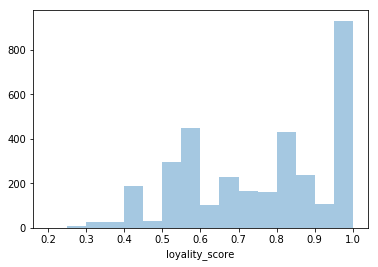

In [132]:
ax = sns.distplot(loyalty_df.loyality_score, kde = False)

In [133]:
loyalty_df.loyality_score.median()

0.8

In [138]:
plot_df = loyalty_df.groupby('lovely_brand', as_index = False)\
    .agg({'loyality_score' : 'median', 'user_id':'count'})

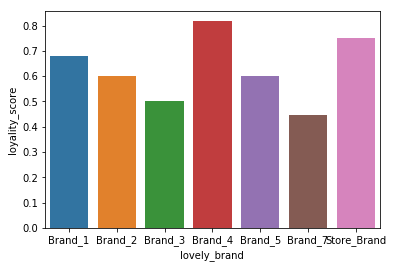

In [139]:
#визуализация
ax = sns.barplot(x='lovely_brand', y = 'loyality_score', data = plot_df )

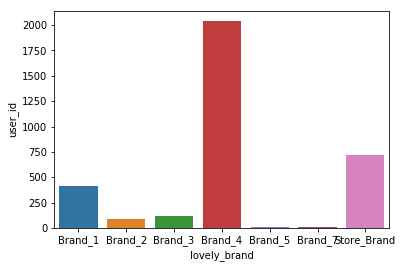

In [140]:
#визуализация
ax = sns.barplot(x='lovely_brand', y = 'user_id', data = plot_df )